In [15]:
#This program fits the O-PPAC data onto an SVR model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
dataset = h5py.File('simu_HDF_new.h5', 'r')
num_diodes = dataset['Num_diodes'][...]
x_pos = (dataset['Xpos'][...])/100
y_pos = dataset['Ypos'][...]
histgrid = dataset['histgrid'][...]
dataset.close()

In [4]:
def data_compile(histdata):
    data = []
    labels = []
    for i in range(histdata.shape[0]):
        for j in range(1,histdata.shape[2]):
            data.append(histdata[i,0:132,j])
            labels.append(x_pos[i])
    return(np.array(data),np.array(labels))

all_data, all_labels = data_compile(histgrid)
all_data.reshape(-1,1)
all_data = normalize(all_data,axis = 1)
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.2,shuffle=True)

In [5]:
SVRModel = SVR()
SVRModel.fit(train_data, train_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
predictions = SVRModel.predict(test_data)
predictions

array([-32.13761364,  -7.88913812, -15.97017444, ...,  23.54755809,
        31.85671654,  23.9099609 ])

In [12]:
mae = mean_absolute_error(test_labels, predictions)
mse = mean_squared_error(test_labels, predictions)
mae, mse

(0.14627720455696946, 0.03853079589209667)

Text(0.5, 1.0, 'FCNN O-PPAC Predictions vs True Values')

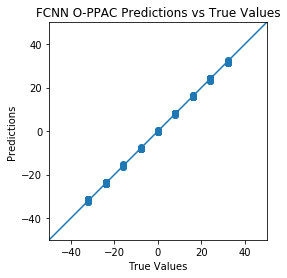

In [13]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-50, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.title("FCNN O-PPAC Predictions vs True Values")